# ECH 152B (Spring 2023)

# Midterm 1 Solutions

### 1  (5 points) 
The saturation pressures for an unknown compound A has been measured at several different temperatures (see Table 1 below). 

Table 1. Experimentally measured saturation pressures at different temperatures for compound A. 

| T (deg C) | $P_i^{sat} $ (kPa)|
|:---------:|:-----------------:|
|   -18.5   |        3.18       |
|     -9    |        5.48       |
|    0.2    |        9.45       |
|    11.3   |        16.9       |
|    23.4   |        28.3       |
|    32.8   |        41.9       |
|    43.5   |        66.6       |
|    54.2   |        89.5       |
|     64    |       129.8       |
|    75.4   |        188        |


#### (1 point) a) 
What is the normal boiling point (at 1 bar pressure)? Hint: you will need to fit the data to an Antoine equation. 

For unknown compound A
---------------------------

Fitted Antoine coefficients upto one standard deviation:
A = 17.1372 +/- 2.954192795906638
B = 4523.6562 +/- 2108.1321897943076
C = 304.6367 +/- 83.00526772592164

Normal Boiling point of unknown compound A at 1 bar is 56.3312 deg C


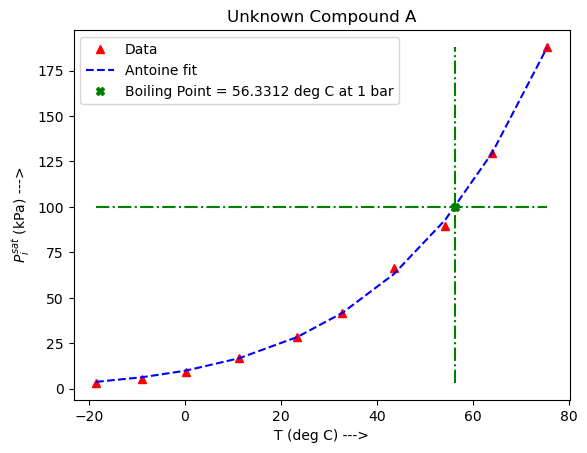

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve

# storing the values of column, 'T' and column, 'Pi_sat' of Table 1 into two arrays
T_arr = np.array([-18.5, -9, 0.2, 11.3, 23.4, 32.8, 43.5, 54.2, 64, 75.4])
Pi_sat_arr = np.array([3.18, 5.48, 9.45, 16.9, 28.3, 41.9, 66.6, 89.5, 129.8, 188])

# the below function will return Pi_sat in kPa for a given T in deg C
def antoine(T, A, B, C):
    return np.exp(A - B/(T+C))

# curve fit is used to fit the above data to antoine equation
parameters, cov_arr = curve_fit(antoine, T_arr, Pi_sat_arr, \
                                p0=[20, 4000, 300], xtol=10e-16)

# unpackaing the values of parameters into A, B, and C (antoine coefficients)
A, B, C = parameters 
params_err = np.sqrt(np.diag(cov_arr))

print(f"For unknown compound A")
print("---------------------------\n")
print(f"Fitted Antoine coefficients upto one standard deviation:")
print(f"A = {A:1.4f} +/- {params_err[0]}")
print(f"B = {B:1.4f} +/- {params_err[1]}")
print(f"C = {C:1.4f} +/- {params_err[2]}\n")

def root(T, Pi_sat, A, B, C):
    return Pi_sat - antoine(T, A, B, C) 

T_req = fsolve(root, 50, args=(100, A, B, C))[0]
print(f"Normal Boiling point of unknown compound A at 1 bar is {T_req:1.4f} deg C")


plt.plot(T_arr, Pi_sat_arr, "r^", label="Data")
plt.plot(T_arr, antoine(T_arr, A, B, C), "b--", label=f"Antoine fit")
plt.plot(T_req, antoine(T_req, A, B, C), "gX", \
         label=f"Boiling Point = {T_req:1.4f} deg C at 1 bar")
plt.xlabel("T (deg C) --->")
plt.ylabel("$P_i^{sat}$ (kPa) --->")
plt.legend()
plt.plot(T_arr, 100*np.ones(len(T_arr)), "g-.")
plt.plot(T_req*np.ones(len(Pi_sat_arr)), Pi_sat_arr, "g-.")
plt.title("Unknown Compound A")
plt.show()

#### (2 points) b)
Assume that compound A is now mixed with water. Draw the Pxy diagram at T = 25 $^0C$ and identify the 2 phase region. 

Let's assume the unknown compound "A" forms an ideal mixture with water. 

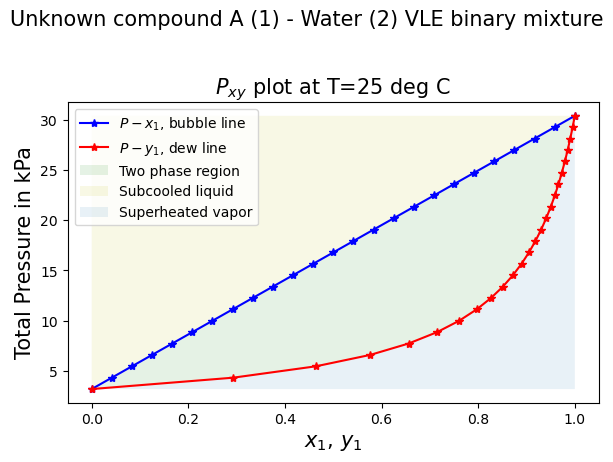

In [2]:
ant_coeffs = {"A"    : (A, B, C), 
              "Water": (16.3872, 3885.70, 230.170)} 

def P_xy(component_1: str, component_2: str, T: float, n_pts:int = 25) -> tuple[list, list, list]:
    x1_range = np.linspace(0.0, 1.0, n_pts)
    x2_range = 1 - x1_range
    P1_range = x1_range*antoine(T, *ant_coeffs[component_1])
    P2_range = x2_range*antoine(T, *ant_coeffs[component_2])
    P_range = P1_range + P2_range
    y1_range = P1_range/P_range
    return x1_range, y1_range, P_range

def plot_Pxy(component_1: str, component_2: str, T: float, n_pts:int = 25, ax = None):
    x1_arr, y1_arr, Pxy_arr = P_xy(component_1, component_2, T, n_pts)
    ax.plot(x1_arr, Pxy_arr, "b*-", label="$P-x_1$, bubble line")
    ax.plot(y1_arr, Pxy_arr, "r*-", label="$P-y_1$, dew line")
    ax.fill(np.append(x1_arr, y1_arr), np.append(Pxy_arr, Pxy_arr), "g", \
            label="Two phase region", alpha=0.1)
    ax.fill(np.append(x1_arr, [0.0]), np.append(Pxy_arr, Pxy_arr[-1]), "y", \
            label="Subcooled liquid", alpha=0.1)
    ax.fill(np.append([1.0], y1_arr), np.append(Pxy_arr[0], Pxy_arr), "p", \
            label="Superheated vapor", alpha=0.1)
    ax.set_xlabel("$x_1$, $y_1$", fontsize=15)
    ax.set_ylabel("Total Pressure in kPa", fontsize=15)
    ax.legend()
    ax.set_title("$P_{xy}$ plot " + f"at T={T} deg C", fontsize=15)
    return ax

fig, ax = plt.subplots(1)
ax = plot_Pxy("A", "Water", T=25, ax=ax)
plt.suptitle(f"Unknown compound A (1) - Water (2) VLE binary mixture", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

#### (2 points) c)
Draw a Txy diagram at 5 bar pressure. 

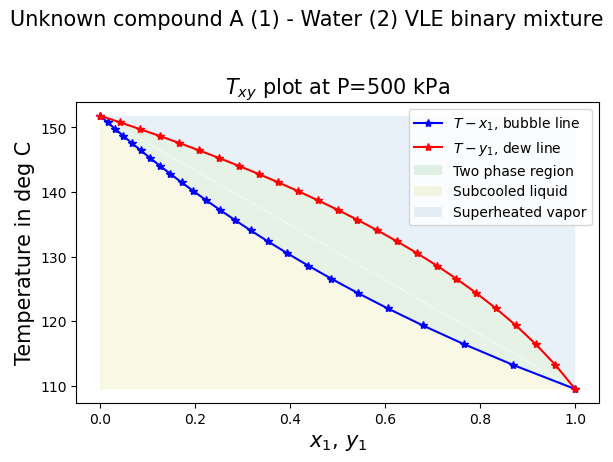

In [3]:
def T_xy(component_1: str, component_2: str, P: float, n_pts:int = 25) -> tuple[list, list, list]:               
    y1_range = np.linspace(0.0, 1.0, n_pts)
    x1_range = np.zeros(len(y1_range))
    T_range = np.zeros(len(y1_range))
    for i, y1 in enumerate(y1_range):
        def find_state(roots): 
            x1, T = roots
            expr_1 = P*y1 - x1*antoine(T, *ant_coeffs[component_1])
            expr_2 = P*(1-y1) - (1-x1)*antoine(T, *ant_coeffs[component_2])
            return expr_1, expr_2
        x1_range[i], T_range[i] = fsolve(find_state, [0.5, 350])
    return x1_range, y1_range, T_range

def plot_Txy(component_1: str, component_2: str, P: float, n_pts:int = 25, ax = None):
    x1_arr, y1_arr, Txy_arr = T_xy(component_1, component_2, P, n_pts)
    ax.plot(x1_arr, Txy_arr, "b*-", label="$T-x_1$, bubble line")
    ax.plot(y1_arr, Txy_arr, "r*-", label="$T-y_1$, dew line")
    ax.fill(np.append(x1_arr, y1_arr), np.append(Txy_arr, Txy_arr), "g", \
            label="Two phase region", alpha=0.1)
    ax.fill(np.append(x1_arr, [0.0]), np.append(Txy_arr, Txy_arr[-1]), "y", \
            label="Subcooled liquid", alpha=0.1)
    ax.fill(np.append([1.0], y1_arr), np.append(Txy_arr[0], Txy_arr), "p", \
            label="Superheated vapor", alpha=0.1)
    ax.set_xlabel("$x_1$, $y_1$", fontsize=15)
    ax.set_ylabel("Temperature in deg C", fontsize=15)
    ax.legend()
    ax.set_title("$T_{xy}$ plot " + f"at P={P} kPa", fontsize=15)
    return ax

fig, ax = plt.subplots(1)
ax = plot_Txy("A", "Water", P=500, ax=ax)
plt.suptitle(f"Unknown compound A (1) - Water (2) VLE binary mixture", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

### 2 (3 points) 
The US natural gas pipeline network has about 3 million miles of mainline and other pipelines. These pipelines ship natural gas (approximated as pure methane) at a pressure of 750 psi at 30 deg C.

#### (1 point) a) 
What is the state of methane under these conditions? 

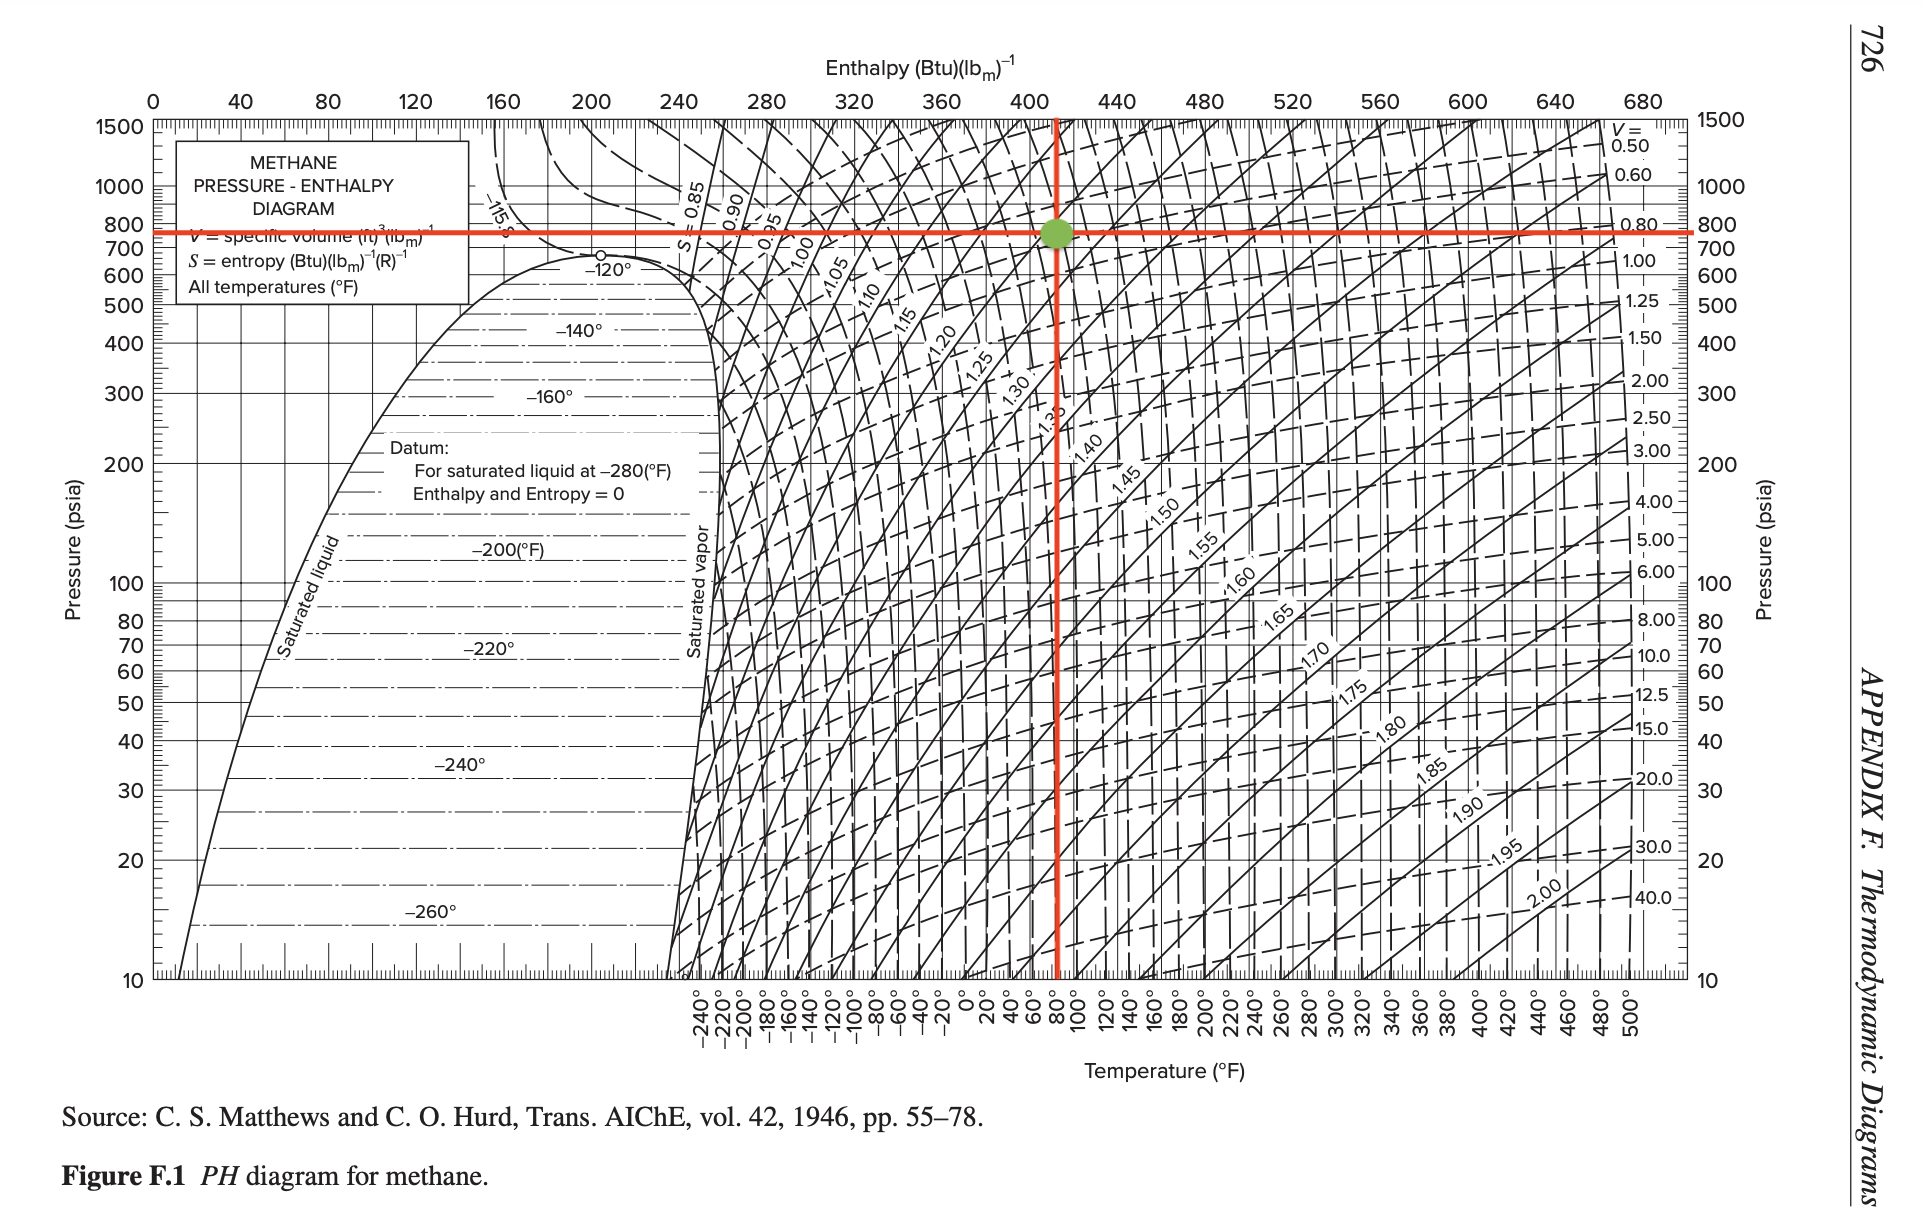

From the above graph, we find methane at 30 $^0C$ (86 $^0F$) and 750 psi (764.7 psia) to be a supercritical fluid. 

#### (2 points) b) 
If these pipes are modified to transport a mixture of 40% propane and 60% n-butane (by mole percent), what is the lowest pressure where this mixture can be shipped as a liquid? Assume the temperature remains the same at 30 deg C.  

https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Mask=4&Type=ANTOINE&Plot=onLinks 

https://webbook.nist.gov/cgi/cbook.cgi?ID=C74840&Mask=4&Type=ANTOINE&Plot=on#ANTOINELinks 

https://webbook.nist.gov/cgi/cbook.cgi?ID=C74986&Mask=4&Type=ANTOINE&Plot=on#ANTOINELinks 

https://webbook.nist.gov/cgi/cbook.cgi?ID=C106978&Mask=4&Type=ANTOINE&Plot=on#ANTOINELinks 

In [4]:
ant_coeffs_new = {"Propane" : (4.53678, 1149.36, 24.906),
                  "n-Butane": (4.35576, 1175.581, -2.071)}

# the below function will return Pi_sat in bar for a given T in K
def antoine_new(T, A, B, C):
    # look carefully at the NIST website, the log is with base 10 and not natural log
    return 10**(A - B/(T+C))  

x1 = 0.4
x2 = 0.6
T = 30+273.15

P_req = x1*antoine_new(T, *ant_coeffs_new["Propane"]) + \
x2*antoine_new(T, *ant_coeffs_new["n-Butane"])

print(f"Lowest pressure to ship a mixture of 40% propane \
and 60% n-butane as a liquid is {P_req:1.4f} bar.")

Lowest pressure to ship a mixture of 40% propane and 60% n-butane as a liquid is 6.0138 bar.


### 3 (2 points) 
Margules 1-parameter model is often written as $\frac{G^E}{RT} = Ax_1x_2$. This form is useful since it is symmetric wrt to (1) and (2). For a few values of A between 0 and 5 (just like the HW), plot $\frac{G^E}{RT}$ vs $x_1$ and $\frac{\Delta G^{mix}}{RT}$ vs $x_1$. What shape do we see for different values of A for these. What does that teach us? For some guidance, oil and water mixtures will have A much larger than 2.0. 

Hints: $\frac{\Delta G^{mix}}{RT} = \frac{\Delta G^{mix, ideal}}{RT} + \frac{G^E}{RT}$ and $\frac{\Delta G^{mix, ideal}}{RT} = \sum x_i\ln x_i$ 
.

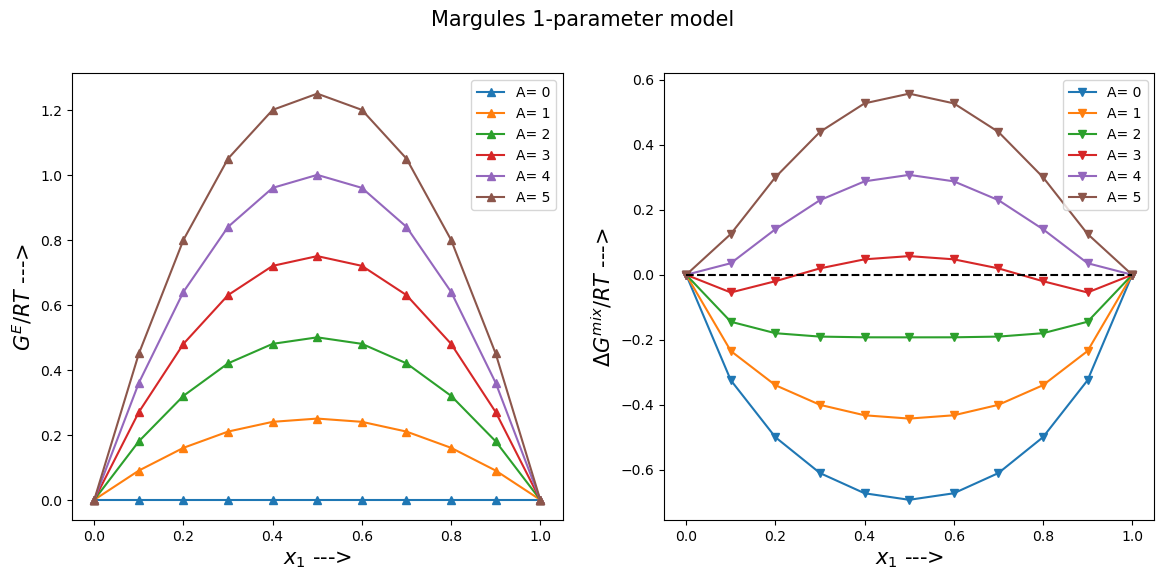

In [5]:
def G_E(x1, A):
    return A*x1*(1-x1)

def delta_G_mix_ideal(x1):
    return x1*np.log(x1) + (1-x1)*np.log(1-x1)

A_arr = np.arange(0, 6)

fig, ax = plt.subplots(1, 2, figsize=((12, 6)))
x1_arr = np.linspace(0.0001, 0.9999, 11)

for A in A_arr:
    G_E_arr = G_E(x1_arr, A)
    ax[0].plot(x1_arr, G_E_arr, "^-", label=f"A= {A}")
    delta_G_mix = delta_G_mix_ideal(x1_arr) + G_E_arr
    ax[1].plot(x1_arr, delta_G_mix, "v-", label=f"A= {A}")

ax[0].set_xlabel("$x_1$ --->", fontsize=15)
ax[0].set_ylabel("$G^E / RT$ --->", fontsize=15)
ax[0].legend()
ax[1].set_xlabel("$x_1$ --->", fontsize=15)
ax[1].set_ylabel("$\Delta G^{mix} / RT$ --->", fontsize=15)
ax[1].legend()
ax[1].plot(x1_arr, np.zeros(len(x1_arr)), 'k--')
plt.suptitle(f"Margules 1-parameter model", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

- "A" equals zero implies ideal mixture and as a result $\frac{G^E}{RT}$ is zero for all values of $x_1$. However as the value of "A" increases, non-ideality increases in the mixture (curvature of $\frac{G^E}{RT}$ increases).

- If $\frac{G^{mix}}{RT}$ < 0 then it implies there is spontaneous mixing and if $\frac{G^{mix}}{RT}$ > 0 then the pure components will not mix. We see for values of "A" greater than 2, the $\frac{G^{mix}}{RT}$ curve becomes concave downward from concave upward. Also, for "A" equal to 3, we find regions of positive $\frac{G^{mix}}{RT}$ indicating, non-mixing. Moreover, this positvie region increases as the value of "A" is increased beyond 3. This non-mixing behavior can be compared with a mixture of oil and water as they don't mix (has very high value of "A").